# IT3311 Assignment - Task 1: Image Classification

You are required to build an image classification model to predict the product category based on the product image.

This analysis aims to be accompaniment to the results of the text classification and the possibilities of using the image classification results together for product category classification.

**Tasks:**

1. **Data Understanding**: Examine the dataset
2. **Data Preparation**: Prepares the data and all necessary preprocessing tasks
3. **Modelling**: Use different text representation and algorithms
4. **Evaluation**: Evaluates results from the algorithms and select the best model

**Done by: Sandhya Palaniappan**

## Import libraries and download the packages

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import gzip, os, sys
from scipy.stats import multivariate_normal
%matplotlib inline
import pandas as pd
from skimage.transform import resize
from glob import glob
from skimage.io import imread

## Read the dataset

*Read in the CSV file*

In [ ]:
image_name = pd.read_csv('data/data/data.csv')
image_name.head()

item_id                        item_name image_name  \
0        1  etude house drawing eye brow ad      1.jpg   
1        2      etude house drawing eyebrow      2.jpg   
2        3       etude -new drawing eyebrow      3.jpg   
3        4  etude house drawing eye brow ad      4.jpg   
4        5      etude house - color my brow      5.jpg   

                                         description category  
0  READY\n[Etude Eyebrow]\nnote : tuliskan di ket...      Eye  
1  READY JGN TNYA LAGI YA \n\nKUALITAS BOLEH DI A...      Eye  
2  Barang ORI ya..\nHarga jg sudah nett..\n\nOpti...      Eye  
3  QTY PM AJA YA :\nATC TIDAK ADA ALASAN APAPUN P...      Eye  
4  ETUDE HOUSE - COLOR MY BROW\n\nTAHAN LAMA, ALI...      Eye

*Read in the images from the image folder*

In [ ]:
def load_product_image(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
product_image=load_product_image('data/data/images')

## Data Understanding
Perform the necessary steps and explain the rationale taken here.



*Print out the images to take a look at the original image*

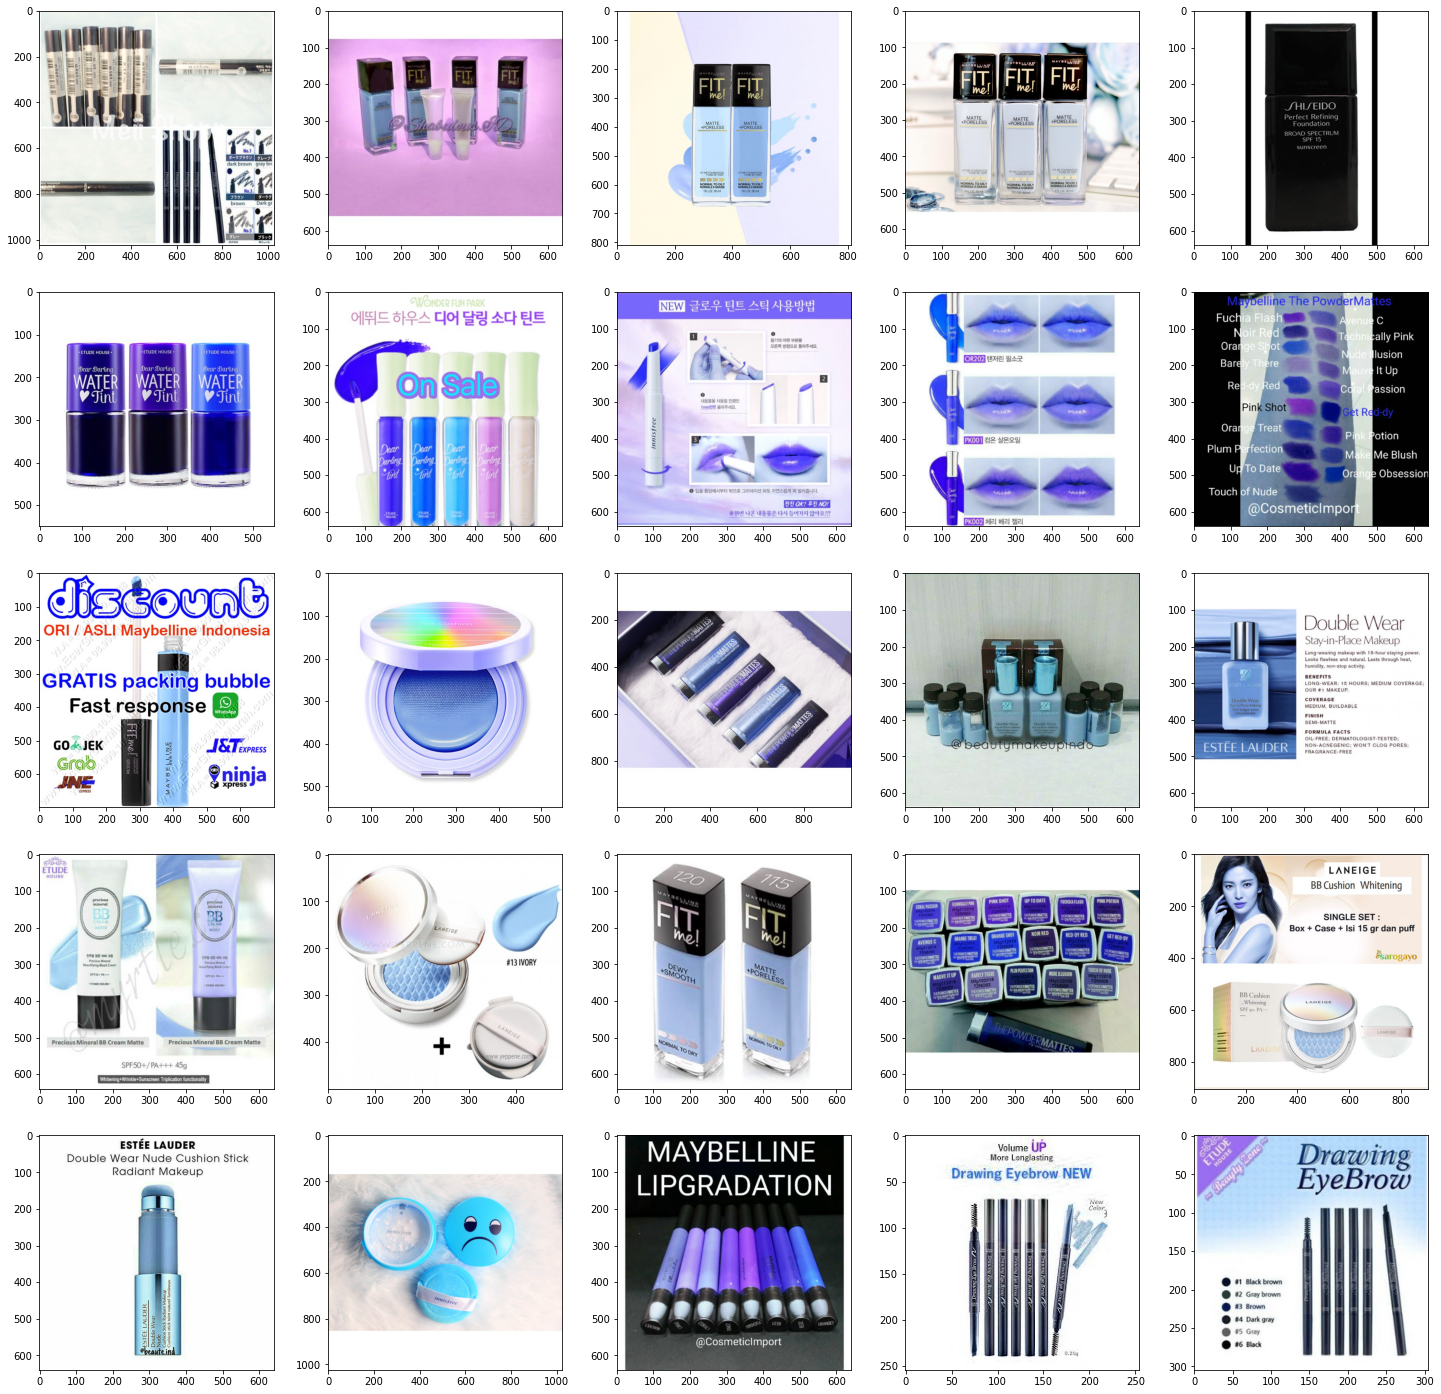

In [ ]:
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(product_image[i])
plt.show()

## Data Preparation
Perform the necessary steps and explain the rationale taken here.



**In this Data Preparation phase, I would perform various preprocessing using the raw images, hog features and sift as I want to find out which combination would gave me the best accuracy. Using the combination with the best accuracy, I will try it out on the other model.**

*Raw Features without any preprocessing* <br>

**In this case, I am just reading in the original images from the images folder without any preprocessing done. The only thing that I did here was to resize the images because I want to ensure that the images that are input into the model are of the same size. In addition, resizing the images would make the model training faster.**

In [ ]:
images = []
raw_X,raw_y = [], []
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    # Check that the image name in the csv file is the same as the image name in the images folder
    target =image_name[image_name.image_name.isin([filename])]
    # If it the image name is the same then I will extract out the category column
    target = target.category.item()
    # read in the images
    img = cv2.imread(os.path.join(folder,filename))
    # resizing the images based on the size specified
    image = cv2.resize(img, (sz,sz))
    images.append(image)
    raw_X.append(image.flatten())
    raw_y.append(target)
raw_X = np.array(raw_X)
raw_y = np.array(raw_y)
raw_indices = np.arange(len(raw_X))
print(raw_X.shape)
print(raw_y.shape)

(1887, 120000)
(1887,)


*Raw Features with grayscaling* <br>

**In this case, after I read in the original images from the images folder, I will preprocess it by grayscaling the images because grayscaling can also help to reduce the dimension of the images and reduces the model complexity which would improve the performance of the model. In addition, the color of the images do not have to be in RGB or BGR as the model does not classify the images based on the color rather based on the object in the images.**

In [ ]:
images =[]
gray_raw_X,gray_raw_y = [], []
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    # Convert the images into grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images.append(image)
    gray_raw_X.append(image.flatten())
    gray_raw_y.append(target)
gray_raw_X = np.array(gray_raw_X)
gray_raw_y = np.array(gray_raw_y)
gray_raw_indices = np.arange(len(gray_raw_X))
print(gray_raw_X.shape)
print(gray_raw_y.shape)

(1887, 40000)
(1887,)


*Raw Features with Gaussian Blurring* <br>

**In this case, after I read in the original images, I will preprocess it by blurring the images using the gaussian blurring as I want to reduce the image noise and help to smoothen the images.**

In [ ]:
images =[]
blur_raw_X,blur_raw_y = [], []
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    # Gaussian blurring
    blurred_img = cv2.GaussianBlur(image,(5,5),10)
    images.append(blurred_img)
    blur_raw_X.append(blurred_img.flatten())
    blur_raw_y.append(target)
blur_raw_X = np.array(blur_raw_X)
blur_raw_y = np.array(blur_raw_y)
blur_raw_indices = np.arange(len(blur_raw_X))
print(blur_raw_X.shape)
print(blur_raw_y.shape)

(1887, 120000)
(1887,)


*Raw Features with Gaussian Blurring & Grayscaling* <br>

**In this case, after reading in the original images, I preprocess the images by grayscaling the images. Afterwards, I blurred the grayscale images as I wanted to see whether does combining these two together would yield a better result than if I were to perform grayscaling and gaussian blurring individually.**

In [ ]:
images =[]
gb_raw_X,gb_raw_y = [], []
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    # Convert the images to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Gaussian Blur the grayscale images
    blurred_img = cv2.GaussianBlur(image,(5,5),10)
    images.append(blurred_img)
    gb_raw_X.append(blurred_img.flatten())
    gb_raw_y.append(target)
gb_raw_X = np.array(gb_raw_X)
gb_raw_y = np.array(gb_raw_y)
gb_raw_indices = np.arange(len(gb_raw_X))
print(gb_raw_X.shape)
print(gb_raw_y.shape)

(1887, 40000)
(1887,)


*Raw Features with Morphological operations*<br>

**In this case, after read in the original images, I would preprocess the images by erosion as it can erode away the boundaries of the foreground object which would reduce the noise in the images.**

In [ ]:
images =[]
Morp_raw_X,Morp_raw_y = [], []
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Take a matrix of size 5 as the kernel
    kernel = np.ones((5,5), np.uint8)
    # Afterward, pass in the original images as the first parameter,
    # the kernel as the second parameter and lastly set the number of iteration which determine how much
    # I want to erode the image
    img_erosion = cv2.erode(image, kernel, iterations=3)
    images.append(img_erosion)
    Morp_raw_X.append(img_erosion.flatten())
    Morp_raw_y.append(target)
Morp_raw_X = np.array(Morp_raw_X)
Morp_raw_y = np.array(Morp_raw_y)
Morp_raw_indices = np.arange(len(Morp_raw_X))
print(Morp_raw_X.shape)
print(Morp_raw_y.shape)

(1887, 120000)
(1887,)


*Raw Features with Gaussian Blurring & Morphological operations*<br>

**In this case, after reading in the original images, I preprocess the images by blurring the images. Afterwards, I would erode the images and similarly, I wanted to see whether does combining these two together would yield a better result than if I were to perform Gaussian blurring and Morphological operation individually.**

In [ ]:
images =[]
GBM_raw_X,GBM_raw_y = [], []
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Gaussian blur the images
    blurred_img = cv2.GaussianBlur(image,(5,5),0)
    # Take a matrix of size 5 as the kernel
    kernel = np.ones((5,5), np.uint8)
    # Afterward, pass in the blurred images as the first parameter,
    # the kernel as the second parameter and lastly set the number of iteration which determine how much
    # I want to erode the image
    img_erosion = cv2.erode(blurred_img, kernel, iterations=3)
    images.append(img_erosion)
    GBM_raw_X.append(img_erosion.flatten())
    GBM_raw_y.append(target)
GBM_raw_X = np.array(GBM_raw_X)
GBM_raw_y = np.array(GBM_raw_y)
GBM_raw_indices = np.arange(len(GBM_raw_X))
print(GBM_raw_X.shape)
print(GBM_raw_y.shape)

(1887, 120000)
(1887,)


*hog_features* <br>

**In the cell below, after I read in the images, resize the images, I will extract out the gradient and orientation of the images  because it works best for detecting object which is esentially what I am trying to do here to detect the object in the images for classification.**

In [ ]:
from skimage.feature import hog
hog_images = []
images =[]
hog_X, hog_y = [], []
ppc = 16
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    hog_y.append(target)
    img = cv2.imread(os.path.join(folder,filename))
    # resize the images
    image = cv2.resize(img, (sz,sz))
    # hog_features where we pass in the follow parameter:
    # Orientation
    # pixels_per_cell
    # cells_per_block
    # In addition, we also set the parameter visualize to true so that it will return an image of the HOG
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),
                           cells_per_block=(4, 4), block_norm= 'L2',visualize=True)
    images.append(image)
    hog_images.append(hog_image)
    hog_X.append(fd)
hog_X = np.array(hog_X)
hog_y = np.array(hog_y)
hog_indices = np.arange(len(hog_X))
print(hog_X.shape)
print(hog_y.shape)

(1887, 10368)
(1887,)


*Hog feature with grayscaling* <br>

**In the code below, after I read in the original images from the images folder, I will preprocess it by grayscaling the images. Afterwards I will extract out the gradient and orientation of the images using hog. I did grayscaling as I feel that the color of the images would not matter that much in this case since we are just extracting out the features of the images.**

In [ ]:
from skimage.feature import hog
hog_images = []
images =[]
gray_hog_X, gray_hog_y = [], []
ppc = 16
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    gray_hog_y.append(target)
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    # Perform grayscaling before extracting the features with the hog
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # hog feature
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),
                           cells_per_block=(4, 4), block_norm= 'L2',visualize=True)
    images.append(image)
    hog_images.append(hog_image)
    gray_hog_X.append(fd)
gray_hog_X = np.array(gray_hog_X)
gray_hog_y = np.array(gray_hog_y)
gray_hog_indices = np.arange(len(gray_hog_X))
print(gray_hog_X.shape)
print(gray_hog_y.shape)

(1887, 10368)
(1887,)


*Hog Features with Gaussian Blurring* <br>

**In the code below, after reading in the original images, I will first preprocess the images by blurring them. Afterwards, I will extract out the gradient and orientation of the images using hog. I did gaussian blurring because gaussian blurring can remove the noise in the images and smotten the image so when we do the hog feature after gaussian blurring it would be extract the features more accurately since the noise in the images have been remove.**

In [ ]:
from skimage.feature import hog
hog_images = []
images =[]
blur_hog_X, blur_hog_y = [], []
ppc = 16
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    blur_hog_y.append(target)
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    # Gaussian blurring on the original images
    blurred_img = cv2.GaussianBlur(image,(5,5),10)
    # hog_features
    fd,hog_image = hog(blurred_img, orientations=8, pixels_per_cell=(ppc,ppc),
                           cells_per_block=(4, 4), block_norm= 'L2',visualize=True)
    images.append(blurred_img)
    hog_images.append(hog_image)
    blur_hog_X.append(fd)
blur_hog_X = np.array(blur_hog_X)
blur_hog_y = np.array(blur_hog_y)
blur_hog_indices = np.arange(len(blur_hog_X))
print(blur_hog_X.shape)
print(blur_hog_y.shape)

(1887, 10368)
(1887,)


*Hog Features with GrayScaling & Gaussian Blurring* <br>

**In this code below, after reading in the original images, I preprocess the images by grayscaling the images. Afterwards, I blurred the grayscale images and extract the graident and orientaion of the images. I have did that as I wanted to see whether does combining these two together would yield a better result than if I were to perform grayscaling and gaussian blurring individually.**

In [ ]:
from skimage.feature import hog
hog_images = []
images =[]
gb_hog_X, gb_hog_y = [], []
ppc = 16
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    gb_hog_y.append(target)
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    # Convert the images to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Blur the grayscale images
    blurred_img = cv2.GaussianBlur(image,(5,5),10)
    # hog_features
    fd,hog_image = hog(blurred_img, orientations=8, pixels_per_cell=(ppc,ppc),
                           cells_per_block=(4, 4), block_norm= 'L2',visualize=True)
    images.append(blurred_img)
    hog_images.append(hog_image)
    gb_hog_X.append(fd)
gb_hog_X = np.array(gb_hog_X)
gb_hog_y = np.array(gb_hog_y)
gb_hog_indices = np.arange(len(gb_hog_X))
print(gb_hog_X.shape)
print(gb_hog_y.shape)

(1887, 10368)
(1887,)


*Hog Features with Morphological operations* <br>

**In this code below, after reading in the original images, I erode the images and extracted out the features of the images using hog. I have did this because I wanted to erode away the boundaries of the foreground and see if it would be able to extract the features of the images more acuractely.**

In [ ]:
from skimage.feature import hog
hog_images = []
images =[]
Morp_hog_X, Morp_hog_y = [], []
ppc = 16
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    Morp_hog_y.append(target)
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    # Take a matrix of size 5 as the kernel
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5,5), np.uint8)
    # Afterward, pass in the original images as the first parameter,
    # the kernel as the second parameter and lastly set the number of iteration which determine how much
    # I want to erode the image
    img_erosion = cv2.erode(image, kernel, iterations=3)
    fd,hog_image = hog(blurred_img, orientations=8, pixels_per_cell=(ppc,ppc),
                           cells_per_block=(4, 4), block_norm= 'L2',visualize=True)
    images.append(img_erosion)
    hog_images.append(hog_image)
    Morp_hog_X.append(fd)
Morp_hog_X = np.array(Morp_hog_X)
Morp_hog_y = np.array(Morp_hog_y)
Morp_hog_indices = np.arange(len(Morp_hog_X))
print(Morp_hog_X.shape)
print(Morp_hog_y.shape)

(1887, 10368)
(1887,)


*Hog Features with Morphological operation & Gaussian Blurring* <br>

**In this code below, after reading in the original images, I preprocess the images by blurring the images and eroding the blur images. Afterwards, I extract the graident and orientaion of the images. I have did that as I wanted to see whether does combining these two together would yield a better result than if I were to perform morphological operation and gaussian blurring individually.**

In [ ]:
from skimage.feature import hog
hog_images = []
images =[]
GBM_hog_X, GBM_hog_y = [], []
ppc = 16
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    GBM_hog_y.append(target)
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Gaussian Blur the images
    blurred_img = cv2.GaussianBlur(image,(5,5),0)
    # Take a matrix of size 5 as the kernel
    kernel = np.ones((5,5), np.uint8)
    # Afterward, pass in the blurred images as the first parameter,
    # the kernel as the second parameter and lastly set the number of iteration which determine how much
    # I want to erode the image
    img_erosion = cv2.erode(blurred_img, kernel, iterations=3)
    fd,hog_image = hog(blurred_img, orientations=8, pixels_per_cell=(ppc,ppc),
                           cells_per_block=(4, 4), block_norm= 'L2',visualize=True)
    images.append(img_erosion)
    hog_images.append(hog_image)
    GBM_hog_X.append(fd)
GBM_hog_X = np.array(GBM_hog_X)
GBM_hog_y = np.array(GBM_hog_y)
GBM_hog_indices = np.arange(len(GBM_hog_X))
print(GBM_hog_X.shape)
print(GBM_hog_y.shape)

(1887, 10368)
(1887,)


*SIFT* <br>

**Firstly, I read in the images and resize the images. Afterwards, I grayscale the images then I use sift to extract the feature by localization. I have to perform grayscale here because sift only work on grayscale images.**

In [ ]:
sift_images = []
sift_X,sift_y = [], []
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    # Convert the images to grayscale
    Gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Create Sift feature extraction
    sift = cv2.SIFT_create()
    # Detect the feature from the image
    Keypoint_descriptors = sift.detect(Gray_image,None)
    # draw the detected keypoints
    img_1 = cv2.drawKeypoints(Gray_image,Keypoint_descriptors,image)
    sift_images.append(img_1)
    sift_X.append(img_1.flatten())
    sift_y.append(target)
sift_X = np.array(sift_X)
sift_y = np.array(sift_y)
sift_indices = np.arange(len(sift_X))
print(sift_X.shape)
print(sift_y.shape)

(1887, 120000)
(1887,)


*Sift with Grayscaling & Gaussian Blurring* <br>

**Firstly, I read in the images and resize the images. Afterwards, I grayscale the images and blur the grayscale images then I use sift to extract the feature by localization. I have to blur the grayscale images here in this case as I wanted to remove the noise and smotthen the images so that sift can locate the features of the images more accurately.**

In [ ]:
sift_images =[]
gb_sift_X,gb_sift_y = [], []
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    Gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Gaussian blur the grayscale image
    blurred_img = cv2.GaussianBlur(Gray_image,(5,5),10)
    # Create Sift feature extraction
    sift = cv2.SIFT_create()
    # Detect the feature from the blur images
    Keypoint_descriptors = sift.detect(Gray_image,None)
    # Draw the detected keypoints
    img_1 = cv2.drawKeypoints(Gray_image,Keypoint_descriptors,blurred_img)
    sift_images.append(img_1)
    gb_sift_X.append(img_1.flatten())
    gb_sift_y.append(target)
gb_sift_X = np.array(gb_sift_X)
gb_sift_y = np.array(gb_sift_y)
gb_sift_indices = np.arange(len(gb_sift_X))
print(gb_sift_X.shape)
print(gb_sift_y.shape)

(1887, 120000)
(1887,)


*Sift with Morphological operations* <br>

**Firstly, I read in the images, resize the images. Afterwards, I grayscale the images and erode the grayscale images then use the sift to extract the feature by localizations. I have erode the images as I wanted to erode away the boundaries of oreground object so that sift can locate the features of the images more accurately.**

In [ ]:
sift_images =[]
Morp_sift_X,Morp_sift_y = [], []
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    Gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Take a matrix of size 5 as the kernel
    kernel = np.ones((5,5), np.uint8)
    # Afterward, pass in the grayscale images as the first parameter,
    # the kernel as the second parameter and lastly set the number of iteration which determine how much
    # I want to erode the image
    img_erosion = cv2.erode(Gray_image, kernel, iterations=3)
    # Create Sift feature extraction
    sift = cv2.SIFT_create()
    # Detect the feature from the erode image
    Keypoint_descriptors = sift.detect(Gray_image,None)
    # Draw the detected keypoints
    img_1 = cv2.drawKeypoints(Gray_image,Keypoint_descriptors,img_erosion)
    sift_images.append(img_1)
    Morp_sift_X.append(img_1.flatten())
    Morp_sift_y.append(target)
Morp_sift_X = np.array(Morp_sift_X)
Morp_sift_y = np.array(Morp_sift_y)
Morp_sift_indices = np.arange(len(Morp_sift_X))
print(Morp_sift_X.shape)
print(Morp_sift_y.shape)

(1887, 120000)
(1887,)


*Sift with Morphological operations & Gaussian Blurring* <br>

**Firstly, I read in the images and resize the images. Afterwards, I grayscale and blur the grayscale images. Lastly, I erode the blur images before using sift to extract out the features by localization I have did that as I wanted to see whether does combining these two together would yield a better result than if I were to perform morphological operation and gaussian blurring individually.**

In [ ]:
sift_images =[]
GBM_sift_X,GBM_sift_y = [], []
sz = 200
folder = "data/data/images"
for filename in os.listdir(folder):
    target =image_name[image_name.image_name.isin([filename])]
    target = target.category.item()
    img = cv2.imread(os.path.join(folder,filename))
    image = cv2.resize(img, (sz,sz))
    Gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Gaussian Blur the grayscale images
    blurred_img = cv2.GaussianBlur(Gray_image,(5,5),10)
    # Take a matrix of size 5 as the kernel
    kernel = np.ones((5,5), np.uint8)
    # Afterward, pass in the blurred images as the first parameter,
    # the kernel as the second parameter and lastly set the number of iteration which determine how much
    # I want to erode the image
    img_erosion = cv2.erode(blurred_img, kernel, iterations=3)
    # Create Sift feature extraction
    sift = cv2.SIFT_create()
    # Detect the feature from the image
    Keypoint_descriptors = sift.detect(Gray_image,None)
    # draw the detected keypoints
    img_1 = cv2.drawKeypoints(Gray_image,Keypoint_descriptors,img_erosion)
    sift_images.append(img_1)
    GBM_sift_X.append(img_1.flatten())
    GBM_sift_y.append(target)
GBM_sift_X = np.array(GBM_sift_X)
GBM_sift_y = np.array(GBM_sift_y)
GBM_sift_indices = np.arange(len(GBM_sift_X))
print(GBM_sift_X.shape)
print(GBM_sift_y.shape)

(1887, 120000)
(1887,)


## Modelling
Perform the necessary steps and explain the rationale taken here.



### Raw Features

*Modelling for Raw_Features without any preprocessing*

**From the classification report, we can see the precision, recall, f1 and support score for each of the category.**

**Based on this classification report, I can see that the model has a better score for the Lip category with a precision of 0.76, recall and f1-score of 0.77 and for the Eye category it has a precision of 0.58, recall of 0.49 and a f1-score of 0.53.**

**As for the Face category, it has a precision of 0.72, recall of 0.77 and f1-score of 0.74. From the accuracy score, the model has an accuracy of 0.704 which is a slightly high accuracy but it might not be able to predict the Eye category that accurately as it has a very low precision, recall and f1-score.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
raw_X_train, raw_X_test, raw_y_train, raw_y_test,raw_id_train, raw_id_test = train_test_split(raw_X, raw_y, raw_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Raw_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Raw_LR_clf.fit(raw_X_train, raw_y_train)
raw_y_pred = Raw_LR_clf.predict(raw_X_test)
print("Accuracy: " + str(accuracy_score(raw_y_test, raw_y_pred)))
print(classification_report(raw_y_test, raw_y_pred))

Accuracy: 0.7037037037037037
              precision    recall  f1-score   support

         Eye       0.58      0.49      0.53        89
        Face       0.72      0.77      0.74       183
         Lip       0.76      0.77      0.77       106

    accuracy                           0.70       378
   macro avg       0.69      0.68      0.68       378
weighted avg       0.70      0.70      0.70       378



C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 44 True Positve, 45 False Negative, 32 False Positive and 257 True Negative while the Face category has 140 True Postive, 43 False Negative, 54 False Positive and 141 True Negative and the Lip category has 82 True Positive, 24 False Negative, 26 False Positive and 246 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category and the False Negative and False Positive for the Lip category is among the lowest therefore it means that there would be less error when classifying the Lip category.**

<AxesSubplot:>

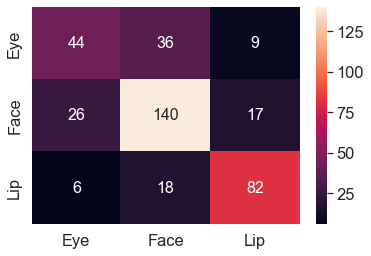

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(raw_y_test,raw_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for Raw_Features with grayscaling*

**From the classification report, we can see the precision, recall, f1 and support score for the model. Based on this classification report, I can see that the model has a better sore for the Face category with a precision of 0.69, recall of 0.79 and f1-score of 0.74 and the Eye category with a precision of 0.55, recall of 0.44 and f1-score of 0.49. As for the Lip category it has a precision of 0.66, recall of 0.61 and f1-score of 0.63.**

**From the accuracy score, the model has an accuracy of 0.656 which is not a very high accuracy and it might not be able to predict the Eye category that accurately as it has very low precision, recall and f1-score.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
gray_X_train, gray_X_test, gray_y_train, gray_y_test, gray_id_train, gray_id_test = train_test_split(gray_raw_X, gray_raw_y, gray_raw_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Gray_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Gray_LR_clf.fit(gray_X_train, gray_y_train)
gray_y_pred = Gray_LR_clf.predict(gray_X_test)
print("Accuracy: " + str(accuracy_score(gray_y_test, gray_y_pred)))
print(classification_report(gray_y_test, gray_y_pred))

Accuracy: 0.656084656084656
              precision    recall  f1-score   support

         Eye       0.55      0.44      0.49        89
        Face       0.69      0.79      0.74       183
         Lip       0.66      0.61      0.63       106

    accuracy                           0.66       378
   macro avg       0.63      0.61      0.62       378
weighted avg       0.65      0.66      0.65       378



C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model. From the confusion matrix, the Eye category has 39 True Positve, 50 False Negative, 32 False Positive and 257 True Negative while the Face category has 144 True Postive, 39 False Negative, 64 False Positive and 131 True Negative and the Lip category has 65 True Positive, 41 False Negative, 34 False Positive and 238 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category but the False Negative and False Positive is also not very low therefore it means that the accuracy of the model is not very high. In fact, after performing grayscaling to the raw_features it perform poorer than the raw_feature that has no preprocessing.**

<AxesSubplot:>

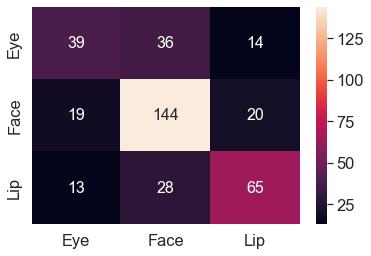

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(gray_y_test,gray_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for Raw_Features with Gaussian Blurring*

**From the classification report, we can see the precision, recall, f1 and support score for the model. Based on this classification report, I can see that the model has a better score for the Lip category with a precision of 0.76, recall of 0.74 and f1-score of 0.75 and the Eye category with a precision of 0.57, recall of 0.46 and f1-score of 0.51.**

**As for the Face category, it has a precision of 0.69, recall of 0.77 and f1-score of 0.73.**

**From the accuracy score, the model has an accuracy of 0.68 which is not a very high accuracy and it might not be able to predict the Eye category that accurately as it has a very low precision, recall and f1-score.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
blur_X_train, blur_X_test, blur_y_train, blur_y_test, blur_id_train, blur_id_test = train_test_split(blur_raw_X, blur_raw_y, blur_raw_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Blur_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Blur_LR_clf.fit(blur_X_train, blur_y_train)
blur_y_pred = Blur_LR_clf.predict(blur_X_test)
print("Accuracy: " + str(accuracy_score(blur_y_test, blur_y_pred)))
print(classification_report(blur_y_test, blur_y_pred))

C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.6878306878306878
              precision    recall  f1-score   support

         Eye       0.57      0.46      0.51        89
        Face       0.69      0.77      0.73       183
         Lip       0.76      0.74      0.75       106

    accuracy                           0.69       378
   macro avg       0.67      0.66      0.66       378
weighted avg       0.68      0.69      0.68       378



**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 41 True Positve, 48 False Negative, 31 False Positive and 258 True Negative while the Face category has 141 True Postive, 42 False Negative, 62 False Positive and 133 True Negative and the Lip category has 78 True Positive, 28 False Negative, 25 False Positive and 247 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category and the False Negative and False Positive for the Lip category is among the lowest therefore it means that there would be less error when classifying the Lip category.**

**In fact, after performing gaussian blurring to the raw_features it perform poorer than the raw_feature without any preprocessing but perform better than raw_features with grayscaling.**

<AxesSubplot:>

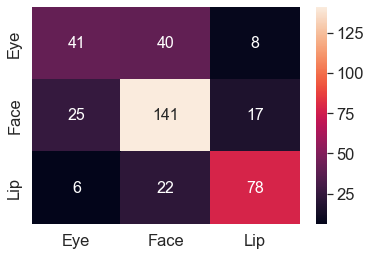

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(blur_y_test,blur_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for Raw_Features with Gaussian Blurring & Grayscaling*

**From the classification report, we can see the precision, recall, f1 and support score for the model.**

**Based on this classification report, I can see that the model has a better score for the face category with a precision of 0.67, recall of 0.75 and f1-score of 0.71 and the Eye category with a precision of 0.53, recall of 0.43 and f1-score of 0.47.**

**As for the Lip category it has a precision of 0.59, recall of 0.57 and f1-score of 0.58.**

**From the accuracy score, the model has an accuracy of 0.62 which is not a very high accuracy and it might not be able to predict the Eye and Lip category that accurately as it has a very low precision, recall and f1-score.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
gb_X_train, gb_X_test, gb_y_train, gb_y_test, gb_id_train, gb_id_test = train_test_split(gb_raw_X, gb_raw_y, gb_raw_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Gb_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Gb_LR_clf.fit(gb_X_train, gb_y_train)
gb_y_pred = Gb_LR_clf.predict(gb_X_test)
print("Accuracy: " + str(accuracy_score(gb_y_test, gb_y_pred)))
print(classification_report(gb_y_test, gb_y_pred))

Accuracy: 0.6216931216931217
              precision    recall  f1-score   support

         Eye       0.53      0.43      0.47        89
        Face       0.67      0.75      0.71       183
         Lip       0.59      0.57      0.58       106

    accuracy                           0.62       378
   macro avg       0.60      0.58      0.59       378
weighted avg       0.61      0.62      0.62       378



C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 38 True Positve, 51 False Negative, 34 False Positive and 255 True Negative while the Face category has 137 True Postive, 46 False Negative, 68 False Positive and 127 True Negative and the Lip category has 60 True Positive, 46 False Negative, 41 False Positive and 231 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category but the False Negative and False Positive is also not very low therefore it means that the accuracy of the model is not very high.**

**In fact, after performing grayscaling & Gaussian blurring it perform the worst as compared to the rest.**

<AxesSubplot:>

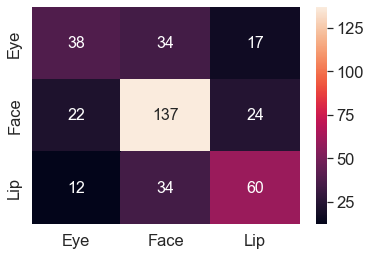

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(gb_y_test,gb_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for Raw_Features with Morphological operations*

**From the classification report, we can see the precision, recall, f1 and support score for the model.**

**Based on this classification report, I can see that the model has a better score for the Face Category with a precision of 0.80, recall of 0.76 and f1-score of 0.78 and for the Eye category it has a precision of 0.63, recall of 0.64, f1-score of 0.63.**

**As for the Lip category it has a precision of 0.68, recall of 0.74 and a f1-score of 0.71. From the accuracy score, the model has an accuracy of 0.72 which is a slightly high accuracy.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
Morp_X_train, Morp_X_test, Morp_y_train, Morp_y_test, Morp_id_train, Morp_id_test = train_test_split(Morp_raw_X, Morp_raw_y, Morp_raw_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Morp_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Morp_LR_clf.fit(Morp_X_train, Morp_y_train)
Morp_y_pred = Morp_LR_clf.predict(Morp_X_test)
print("Accuracy: " + str(accuracy_score(Morp_y_test, Morp_y_pred)))
print(classification_report(Morp_y_test, Morp_y_pred))

C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.7248677248677249
              precision    recall  f1-score   support

         Eye       0.63      0.64      0.63        89
        Face       0.80      0.76      0.78       183
         Lip       0.68      0.74      0.71       106

    accuracy                           0.72       378
   macro avg       0.70      0.71      0.71       378
weighted avg       0.73      0.72      0.73       378



**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 57 True Positve, 32 False Negative, 34 False Positive and 255 True Negative while the Face category has 139 True Postive, 44 False Negative, 34 False Positive and 161 True Negative and the Lip category has 78 True Positive, 28 False Negative, 36 False Positive and 236 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category but the False Negative and False Positve is also much lower as compared to the other therefore it means that the accuracy of the model would be slightly higher.**

**In fact, after performing morphological operation it has one of the best accuracy.**

<AxesSubplot:>

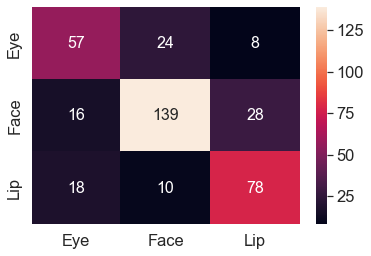

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(Morp_y_test,Morp_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for Raw_Features with Gaussian Blurring & Morphological operations*

**From the classification report, we can see the precision, recall, f1 and support score for the model.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision and f1-score of 0.76 and recall of 0.77 and the Eye category with a precision, recall and f1-score of 0.58.**

**As for the Lip category, it has a precision of 0.71, recall of 0.69 and f1-score of 0.70. From the accuracy score, the model has an accuracy of 0.704 which is a slightly high accuracy but it might not be able to predict the Eye category that accurately as it has a very low precision, recall and f1-score.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
GBM_X_train, GBM_X_test, GBM_y_train, GBM_y_test, GBM_id_train, GBM_id_test = train_test_split(GBM_raw_X, GBM_raw_y, GBM_raw_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
GBM_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
GBM_LR_clf.fit(GBM_X_train, GBM_y_train)
GBM_y_pred = GBM_LR_clf.predict(GBM_X_test)
print("Accuracy: " + str(accuracy_score(GBM_y_test,GBM_y_pred)))
print(classification_report(GBM_y_test,GBM_y_pred))

C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.7037037037037037
              precision    recall  f1-score   support

         Eye       0.58      0.58      0.58        89
        Face       0.76      0.77      0.76       183
         Lip       0.71      0.69      0.70       106

    accuracy                           0.70       378
   macro avg       0.68      0.68      0.68       378
weighted avg       0.70      0.70      0.70       378



**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 52 True Positve, 37 False Negative, 37 False Positive and 252 True Negative while the Face category has 141 True Postive, 42 False Negative, 45 False Positive and 150 True Negative and the Lip category has 73 True Positive, 33 False Negative, 30 False Positive and 242 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category but the False Negative and False Positive is also not very low therefore it means that the accuracy of the model is not very high.**

<AxesSubplot:>

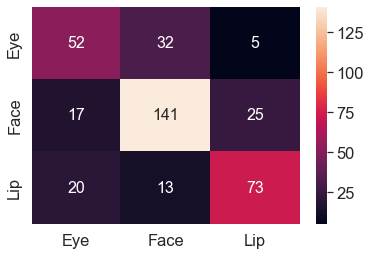

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(GBM_y_test,GBM_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

### HOG Features

*Modelling for HOG_Features*

**From the classification report, we can see the precision, recall, f1 and support score for the model.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision of 0.76, recall of 0.74 and f1-score of 0.75 and the Eye category has a precision of 0.65, recall of 0.62 and f1-score of 0.63. As for thee Lip category it has a precision of 0.64, recall of 0.7 and f1-score of 0.67.**

**From the accuracy score, the model has an accuracy of 0.701 which is a slightly high accuracy.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
Hog_X_train, Hog_X_test, Hog_y_train, Hog_y_test, Hog_id_train,Hog_id_test = train_test_split(hog_X, hog_y, hog_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Hog_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Hog_LR_clf.fit(Hog_X_train, Hog_y_train)
Hog_y_pred = Hog_LR_clf.predict(Hog_X_test)
print("Accuracy: " + str(accuracy_score(Hog_y_test, Hog_y_pred)))
print(classification_report(Hog_y_test, Hog_y_pred))

Accuracy: 0.701058201058201
              precision    recall  f1-score   support

         Eye       0.65      0.62      0.63        89
        Face       0.76      0.74      0.75       183
         Lip       0.64      0.70      0.67       106

    accuracy                           0.70       378
   macro avg       0.68      0.69      0.69       378
weighted avg       0.70      0.70      0.70       378



C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 55 True Positve, 34 False Negative, 30 False Positive and 259 True Negative while the Face category has 136 True Postive, 47 False Negative, 42 False Positive and 153 True Negative and the Lip category has 74 True Positive, 32 False Negative, 41 False Positive and 231 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category but the False Negative and False Positive is also not very low therefore it means that the accuracy of the model is not very high.**

<AxesSubplot:>

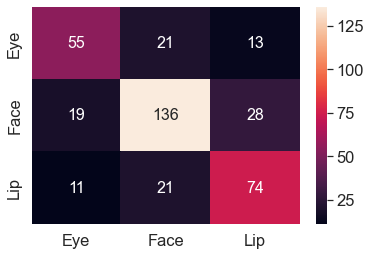

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(Hog_y_test,Hog_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for HOG_Features with grayscaling*

**From the classification report, we can see the precision, recall, f1 and support score for the model.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision of 0.74, recall of 0.72 and f1-score of 0.73 and the Eye category has a precision of 0.62, recall of 0.61 and f1-score of 0.61.**

**As for the Lip category it has a precision of 0.64, recall of 0.68 and f1-score of 0.66.**

**From the accuracy score, the model has an accuracy of 0.68 which is not a very high accuracy.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
Hog_gray_X_train, Hog_gray_X_test, Hog_gray_y_train, Hog_gray_y_test, Hog_gray_id_train, Hog_gray_id_test = train_test_split(gray_hog_X, gray_hog_y, gray_hog_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Hog_gray_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Hog_gray_LR_clf.fit(Hog_gray_X_train, Hog_gray_y_train)
Hog_gray_y_pred = Hog_gray_LR_clf.predict(Hog_gray_X_test)
print("Accuracy: " + str(accuracy_score(Hog_gray_y_test, Hog_gray_y_pred)))
print(classification_report(Hog_gray_y_test, Hog_gray_y_pred))

Accuracy: 0.6825396825396826
              precision    recall  f1-score   support

         Eye       0.62      0.61      0.61        89
        Face       0.74      0.72      0.73       183
         Lip       0.64      0.68      0.66       106

    accuracy                           0.68       378
   macro avg       0.67      0.67      0.67       378
weighted avg       0.68      0.68      0.68       378



C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 54 True Positve, 35 False Negative, 33 False Positive and 256 True Negative while the Face category has 132 True Postive, 51 False Negative, 47 False Positive and 148 True Negative and the Lip category has 72 True Positive, 34 False Negative, 40 False Positive and 232 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category but the False Negative and False Positive is also not very low therefore it means that the accuracy of the model is not very high. In fact, after performing grayscaling to the hog_feature it perform poorer than the hog_feature without any preprocessing.**

<AxesSubplot:>

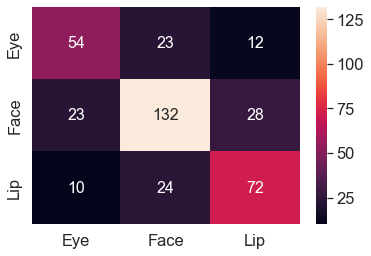

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(Hog_gray_y_test, Hog_gray_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for HOG_Features with Gaussian Blurring*

**From the classification report, we can see the precision, recall, f1 and support score for the model.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision of 0.77, recall of 0.75, f1-score of 0.76 and the Eye category with a precision of 0.61, recall of 0.57 and f1-score of 0.59.**

**As for the Lip category it has a precision of 0.64, recall of 0.72 and f1-score of 0.68.**

**From the accuracy score, the model has an accuracy of 0.69 which is not a very high accuracy but it might not be able to predict the Eye category that accurately as it has a very low precision, recall and f1-score.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
Hog_blur_X_train, Hog_blur_X_test, Hog_blur_y_train, Hog_blur_y_test, Hog_blur_id_train, Hog_blur_id_test = train_test_split(blur_hog_X, blur_hog_y, blur_hog_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Hog_blur_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Hog_blur_LR_clf.fit(Hog_blur_X_train, Hog_blur_y_train)
Hog_blur_y_pred = Hog_blur_LR_clf.predict(Hog_blur_X_test)
print("Accuracy: " + str(accuracy_score(Hog_blur_y_test, Hog_blur_y_pred)))
print(classification_report(Hog_blur_y_test, Hog_blur_y_pred))

Accuracy: 0.6984126984126984
              precision    recall  f1-score   support

         Eye       0.61      0.57      0.59        89
        Face       0.77      0.75      0.76       183
         Lip       0.64      0.72      0.68       106

    accuracy                           0.70       378
   macro avg       0.68      0.68      0.68       378
weighted avg       0.70      0.70      0.70       378



C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 51 True Positve, 38 False Negative, 32 False Positive and 257 True Negative while the Face category has 137 True Postive, 46 False Negative, 40 False Positive and 155 True Negative and the Lip category has 76 True Positive, 30 False Negative, 42 False Positive and 230 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category but the False Negative and False Positve is also not very low therefore it means that the accuracy of the model is not very high.**

**In fact, after performing gaussian blurring to the hog_features it performs poorer than the hog_feature but better than hog_feature with grayscaling.**

<AxesSubplot:>

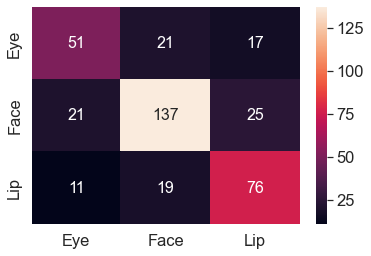

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(Hog_blur_y_test, Hog_blur_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for HOG_Features with Grayscaling & Gaussian Blurring*

**From the classification report, we can see the precision, recall, f1 and support score for the model.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision of 0.82, recall of 0.78, f1-score of 0.80 and the Eye category with a precision of 0.66, recall of 0.63 and f1-score of 0.64.**

**As for the Lip category it has a precision of 0.70, recall of 0.79 and f1-score of 0.74. From the accuracy score, the model has an accuracy of 0.74 which is a slightly high accuracy.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
Hog_gb_X_train, Hog_gb_X_test, Hog_gb_y_train, Hog_gb_y_test, Hog_gb_id_train, Hog_gb_id_test = train_test_split(gb_hog_X, gb_hog_y, gb_hog_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Hog_gb_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Hog_gb_LR_clf.fit(Hog_gb_X_train, Hog_gb_y_train)
Hog_gb_y_pred = Hog_gb_LR_clf.predict(Hog_gb_X_test)
print("Accuracy: " + str(accuracy_score(Hog_gb_y_test, Hog_gb_y_pred)))
print(classification_report(Hog_gb_y_test, Hog_gb_y_pred))

Accuracy: 0.746031746031746
              precision    recall  f1-score   support

         Eye       0.66      0.63      0.64        89
        Face       0.82      0.78      0.80       183
         Lip       0.70      0.79      0.74       106

    accuracy                           0.75       378
   macro avg       0.73      0.73      0.73       378
weighted avg       0.75      0.75      0.75       378



C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 56 True Positve, 33 False Negative, 29 False Positive and 260 True Negative while the Face category has 142 True Postive, 41 False Negative, 31 False Positive and 164 True Negative and the Lip category has 84 True Positive, 22 False Negative, 36 False Positive and 236 True Negative.<br>**

**This shows that there is a high True Positive and True Negative for all the category but the False Positive and False Negative is also not very low. In fact, performing gaussian blurring and grayscaling has the best accuracy as compared to the others.**

<AxesSubplot:>

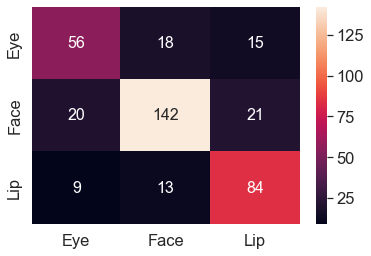

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(Hog_gb_y_test, Hog_gb_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for HOG_Features with Morphological operations*<br>

**From the classification report, we can see the precision, recall, f1 and support score for the model.**

**Based on this classification report, I can see the model only have the precision, recall and f1-score for Face category which is 0.48, 1.00 and 0.65 respectively.**

**From the accuracy score, the model has an accuracy of 0.48 which is a very low accuracy.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
Hog_Morp_X_train, Hog_Morp_X_test, Hog_Morp_y_train, Hog_Morp_y_test, Hog_Morp_id_train, Hog_Morp_id_test = train_test_split(Morp_hog_X, Morp_hog_y, Morp_hog_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Hog_Morp_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Hog_Morp_LR_clf.fit(Hog_Morp_X_train, Hog_Morp_y_train)
Hog_Morp_y_pred = Hog_Morp_LR_clf.predict(Hog_Morp_X_test)
print("Accuracy: " + str(accuracy_score(Hog_Morp_y_test, Hog_Morp_y_pred)))
print(classification_report(Hog_Morp_y_test, Hog_Morp_y_pred))

Accuracy: 0.48412698412698413
              precision    recall  f1-score   support

         Eye       0.00      0.00      0.00        89
        Face       0.48      1.00      0.65       183
         Lip       0.00      0.00      0.00       106

    accuracy                           0.48       378
   macro avg       0.16      0.33      0.22       378
weighted avg       0.23      0.48      0.32       378



C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 89 False Negative and 289 True Negative while the Face category has 183 True Postive and 195 False Positive and the Lip category has 106 False Negative and 272 True Negative.<br>**

**This shows that there is a high True Positive and True Negative for all the category but the False Negative and False Positve is also much higher therefore it means that the accuracy of the model is very low.**

**In fact, performing Morphological operations perform the worst among the others.**

<AxesSubplot:>

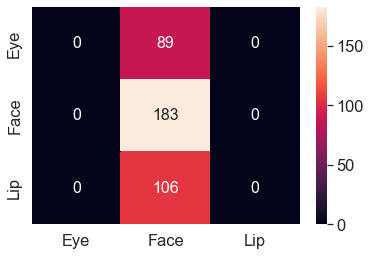

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(Hog_Morp_y_test, Hog_Morp_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for HOG_Features with Gaussian Blurring & Morphological operations*<br>

**From the classification report, we can see the precision, recall, f1 and support score for the model.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision of 0.78, recall of 0.75 and f1-score of 0.76 and the Eye category has a precision of 0.60,recall of 0.58 and f1-score of 0.59.**

**As for the Lip category it has a precision of 0.66, recall of 0.72 and f1-score of 0.69.**

**From the accuracy score, the model has an accuracy of 0.701 which is a slightly high accuracy but it might not be able to predict the Eye category that accurately as it has a very low precision, recall and f1-score.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
Hog_GBM_X_train, Hog_GBM_X_test, Hog_GBM_y_train, Hog_GBM_y_test, Hog_GBM_id_train, Hog_GBM_id_test = train_test_split(GBM_hog_X, GBM_hog_y, GBM_hog_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Hog_GBM_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Hog_GBM_LR_clf.fit(Hog_GBM_X_train, Hog_GBM_y_train)
Hog_GBM_y_pred = Hog_GBM_LR_clf.predict(Hog_GBM_X_test)
print("Accuracy: " + str(accuracy_score(Hog_GBM_y_test, Hog_GBM_y_pred)))
print(classification_report(Hog_GBM_y_test, Hog_GBM_y_pred))

Accuracy: 0.701058201058201
              precision    recall  f1-score   support

         Eye       0.60      0.58      0.59        89
        Face       0.78      0.75      0.76       183
         Lip       0.66      0.72      0.69       106

    accuracy                           0.70       378
   macro avg       0.68      0.68      0.68       378
weighted avg       0.70      0.70      0.70       378



C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 52 True Positve, 37 False Negative, 35 False Positive and 254 True Negative while the Face category has 137 True Postive, 46 False Negative, 39 False Positive and 156 True Negative and the Lip category has 76 True Positive, 30 False Negative, 39 False Positive and 233 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category but the False Negative and False Positve is also not very low therefore it means that the accuracy of the model is not very high.**

<AxesSubplot:>

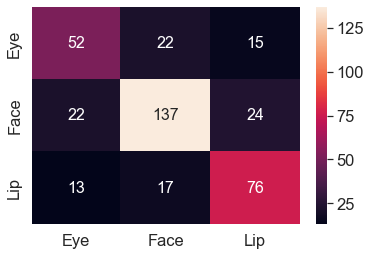

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(Hog_GBM_y_test, Hog_GBM_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

### Sift

*Modelling for Sift*

**From the classification report, we can see the precision, recall, f1 and support score for each of the category.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision of 0.66, recall of 0.73 and f1-score of 0.69 and for the Eye category it has a precision of 0.49, recall of 0.42 and a f1-score of 0.45.**

**As for the Lip category, it has a precision of 0.60, recall of 0.57 and f1-score of 0.58.**

**From the accuracy score, the model has an accuracy of 0.608 which is not a very high accuracy but it might not be able to predict the Eye and Lip category that accurately as it has a very low precision, recall and f1-score.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
sift_X_train, sift_X_test, sift_y_train, sift_y_test,sift_id_train, sift_id_test = train_test_split(sift_X, sift_y, sift_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
sift_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
sift_LR_clf.fit(sift_X_train, sift_y_train)
sift_y_pred = sift_LR_clf.predict(sift_X_test)
print("Accuracy: " + str(accuracy_score(sift_y_test, sift_y_pred)))
print(classification_report(sift_y_test, sift_y_pred))

Accuracy: 0.6084656084656085
              precision    recall  f1-score   support

         Eye       0.49      0.42      0.45        89
        Face       0.66      0.73      0.69       183
         Lip       0.60      0.57      0.58       106

    accuracy                           0.61       378
   macro avg       0.58      0.57      0.57       378
weighted avg       0.60      0.61      0.60       378



C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 37 True Positve, 52 False Negative, 38 False Positive and 251 True Negative while the Face category has 133 True Postive, 50 False Negative, 70 False Positive and 125 True Negative and the Lip category has 60 True Positive, 46 False Negative, 40 False Positive and 232 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category and the False Negative and False Positve is also much higher therefore it means that the accuracy of the model is not very high.**

<AxesSubplot:>

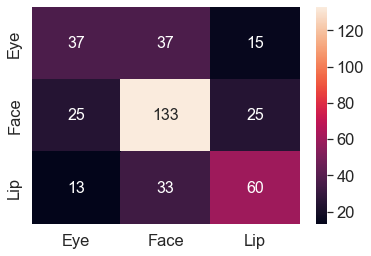

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(sift_y_test, sift_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for Sift for Gaussian Blurring & Grayscaling*

**From the classification report, we can see the precision, recall, f1 and support score for each of the category.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision of 0.68, recall of 0.73 and f1-score of 0.70 and for the Eye category it has a precision of 0.53, recall of 0.45 and a f1-score of 0.48.**

**As for the Lip category, it has a precision, recall and f1-score of 0.63.**

**From the accuracy score, the model has an accuracy of 0.635 which is not a very high accuracy but it might not be able to predict the Eye category that accurately as it has a very low precision, recall and f1-score.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
gb_sift_X_train, gb_sift_X_test, gb_sift_y_train, gb_sift_y_test,gb_sift_id_train, gb_sift_id_test = train_test_split(gb_sift_X, gb_sift_y, gb_sift_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
gb_sift_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
gb_sift_LR_clf.fit(gb_sift_X_train, gb_sift_y_train)
gb_sift_y_pred = gb_sift_LR_clf.predict(gb_sift_X_test)
print("Accuracy: " + str(accuracy_score(gb_sift_y_test, gb_sift_y_pred)))
print(classification_report(gb_sift_y_test, gb_sift_y_pred))

Accuracy: 0.6349206349206349
              precision    recall  f1-score   support

         Eye       0.53      0.45      0.48        89
        Face       0.68      0.73      0.70       183
         Lip       0.63      0.63      0.63       106

    accuracy                           0.63       378
   macro avg       0.61      0.60      0.61       378
weighted avg       0.63      0.63      0.63       378



C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**For classification, we would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 40 True Positve, 49 False Negative, 36 False Positive and 253 True Negative while the Face category has 133 True Postive, 50 False Negative, 62 False Positive and 133 True Negative and the Lip category has 65 True Positive, 39 False Negative, 40 False Positive and 234 True Negative. <br>**

**This shows that there is a high True Positive and True Negative for all the category but the False Negative and False Positve is also not very low therefore it means that the accuracy of the model is not very high.**

<AxesSubplot:>

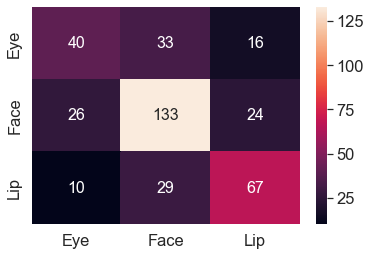

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(gb_sift_y_test, gb_sift_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for Sift for Morphological operations*

**From the classification report, we can see the precision, recall, f1 and support score for each of the category.**

**Based on this classification report, I can see that the model that has a better score for the Face category with a precision of 0.69, recall of 0.76 and f1-score of 0.71 and the model has the worst score for the Eye category with a precision of 0.55, a recall of 0.46 and f1-score of 0.50.**

**As for the Lip category, it has a precision, recall and f1-score of 0.62. From the accuracy score, the model has an accuracy of 0.63 which is not a very high accuracy.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
Morp_sift_X_train, Morp_sift_X_test, Morp_sift_y_train, Morp_sift_y_test,Morp_sift_id_train, Morp_sift_id_test = train_test_split(Morp_sift_X, Morp_sift_y, Morp_sift_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
Morp_sift_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
Morp_sift_LR_clf.fit(Morp_sift_X_train, Morp_sift_y_train)
Morp_sift_y_pred = Morp_sift_LR_clf.predict(Morp_sift_X_test)
print("Accuracy: " + str(accuracy_score(Morp_sift_y_test, Morp_sift_y_pred)))
print(classification_report(Morp_sift_y_test, Morp_sift_y_pred))

C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.6402116402116402
              precision    recall  f1-score   support

         Eye       0.55      0.46      0.50        89
        Face       0.69      0.74      0.71       183
         Lip       0.62      0.62      0.62       106

    accuracy                           0.64       378
   macro avg       0.62      0.61      0.61       378
weighted avg       0.64      0.64      0.64       378



**I would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 41 True Positive, 48 False Negative, 34 False Positive and 255 True Negative while the Face category has 135 True Postive, 48 False Negative, 61 False Positive and 134 True Negative and the Lip category has 66 True Positive, 40 False Negative, 41 False Positive and 231 True Negative. <br>**

**From the confusion matrix it shows that there is a high True Positive and True Negative for all the category but the false negative and false negative is also not very low therefore it means that the accuracy of the model is not very high.**

<AxesSubplot:>

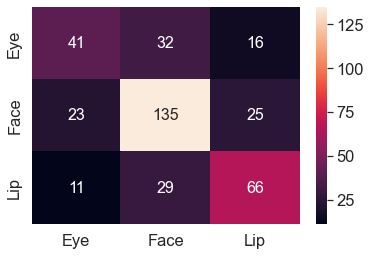

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(Morp_sift_y_test, Morp_sift_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

*Modelling for Sift for Morphological operation & Gaussian Blurring*

**From the classification report, we can see the precision, recall, f1 and support score for each of the category.**

**Based on this classification report, I can see that the model that has a better score for the Face category with a precision of 0.70, recall of 0.73 and f1-score of 0.76 and the model has the worst score for the Eye category with a precision of 0.47, recall of 0.42 and f1-score of 0.44.**

**As for the Lip category, it has a precision and f1-score of 0.64 and a recall of 0.65. From the accuracy score, the model has an accuracy of 0.63 which is not a very high accuracy.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
GBM_sift_X_train, GBM_sift_X_test, GBM_sift_y_train, GBM_sift_y_test,GBM_sift_id_train,GBM_sift_id_test = train_test_split(GBM_sift_X, GBM_sift_y, GBM_sift_indices, test_size=0.2, random_state=42)

# Train a LogisticRegression classifier
GBM_sift_LR_clf = LogisticRegression(C=1000, random_state=42, solver='lbfgs', multi_class='multinomial')
GBM_sift_LR_clf.fit(GBM_sift_X_train, GBM_sift_y_train)
GBM_sift_y_pred = GBM_sift_LR_clf.predict(GBM_sift_X_test)
print("Accuracy: " + str(accuracy_score(GBM_sift_y_test, GBM_sift_y_pred)))
print(classification_report(GBM_sift_y_test, GBM_sift_y_pred))

C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.6349206349206349
              precision    recall  f1-score   support

         Eye       0.47      0.42      0.44        89
        Face       0.70      0.73      0.71       183
         Lip       0.64      0.65      0.64       106

    accuracy                           0.63       378
   macro avg       0.60      0.60      0.60       378
weighted avg       0.63      0.63      0.63       378



**I would also use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 37 True Positive, 52 False Negative, 41 False Positive and 248 True Negative while the Face Category has 134 True Positive, 49 False Ngegative, 58 False Positive and 137 True Negative and the Lip category has 69 True Positive, 37 False Negative, 39 False Positive and 233 True Negative.**

**This shows that there is a high  True Positive and True Negative for all the category but the False Negative and False Positive is also not very low therefore it means that the accuracy of the model is not very high.**

<AxesSubplot:>

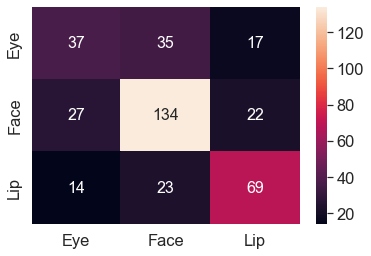

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(GBM_sift_y_test, GBM_sift_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

### Trying out other models

*KNN* <br><br>
**I have used KNN classifier as it a classifier that is used for multi class classification. <br>**

**From the classification report, we are able to see the precision, recall, F1 and support score for each of the category.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision of 0.83, recall of 0.68 and f1-score of 0.75 and for the Eye category it has a precision of 0.67, recall of 0.74 and f1-score of 0.67. As for the Lip category it has a precision of 0.65, recall of 0.74 and f1-score of 0.69. <br>**

**From the accuracy score, the model has an accuracy of 0.71 which is a slightly high accuracy.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Hog_gb_X_train, Hog_gb_X_test, Hog_gb_y_train, Hog_gb_y_test, Hog_gb_id_train, Hog_gb_id_test = train_test_split(gb_hog_X, gb_hog_y, gb_hog_indices, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(Hog_gb_X_train, np.ravel(Hog_gb_y_train))
print(classification_report(Hog_gb_y_test, knn_classifier.predict(Hog_gb_X_test)))
knn_Hog_gb_y_pred = knn_classifier.predict(Hog_gb_X_test)
print("Accuracy: " + str(accuracy_score(Hog_gb_y_test, knn_Hog_gb_y_pred)))

              precision    recall  f1-score   support

         Eye       0.61      0.74      0.67        89
        Face       0.83      0.68      0.75       183
         Lip       0.65      0.74      0.69       106

    accuracy                           0.71       378
   macro avg       0.70      0.72      0.70       378
weighted avg       0.73      0.71      0.71       378

Accuracy: 0.7116402116402116


**For classification we would use the confusion matrix to have a more comprehensive overview of the performance of the model.**

 **From the confusion matrix, the Eye category has 66 True Positive, 23 False Negative, 42 False Positive and 247 True Negative while for the Face category has 125 True Positive, 58 False Negative, 25 False Positive and 170 True Negative and the Lip category has 78 True Positive, 28 False Negative, 42 False Positive and 230 True Negative.<br>**

**This shows that there is a high True Postive and True negative but the False Negative and False Positive is also not very low which means that the accuracy of the model is not very high.**

<AxesSubplot:>

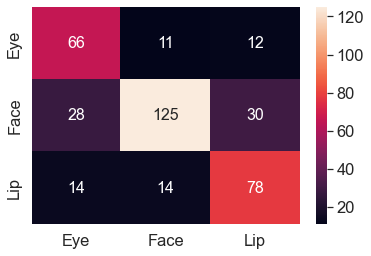

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(Hog_gb_y_test, knn_Hog_gb_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

**After seeing the result from the KNN classifier, I want to find out the best hyperparameter and accuracy score for the model so as to improve the accuracy.**

**I am using gridsearch cv where it would try out the various hyperparameter and return the hyperparameter that gives the best accuracy.**

In [ ]:
from sklearn.model_selection import GridSearchCV
n_neighbors = list(range(1,30))
leaf_size = list(range(1,50))
p=[1,2]
#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)
#Making model
clf = GridSearchCV(knn_classifier, hyperparameters, cv=10)
best_model = clf.fit(Hog_gb_X_train, np.ravel(Hog_gb_y_train))
#Best Hyperparameters Value
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
#Predict testing set
knn_Hog_gb_y_pred = best_model.predict(Hog_gb_X_test)
#Check performance using accuracy
print(accuracy_score(Hog_gb_y_test, knn_Hog_gb_y_pred))

Best p: 2
Best leaf_size: 30
Best n_neighbors: 1
0.7566137566137566


**Indeed after tuning the hyperparameter, the accuracy of the KNN classifier improve from 0.71 to 0.76.**

**Based on the classification report, I can see that the model has a better score for the Face category with a precision of 0.86, recall of 0.77 and f1-score of 0.81 while for the Eye category it has a precision of 0.69, recall of 0.66 and f1-score of 0.68.**

**As for the Lip category it has a precision of 0.67, recall of 0.81 and a f1-score of 0.73.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Hog_gb_X_train, Hog_gb_X_test, Hog_gb_y_train, Hog_gb_y_test, Hog_gb_id_train, Hog_gb_id_test = train_test_split(gb_hog_X, gb_hog_y, gb_hog_indices, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(p=2, leaf_size=30,n_neighbors=1)
knn_classifier.fit(Hog_gb_X_train, np.ravel(Hog_gb_y_train))
print(classification_report(Hog_gb_y_test, knn_classifier.predict(Hog_gb_X_test)))
knn_Hog_gb_y_pred = knn_classifier.predict(Hog_gb_X_test)
print("Accuracy: " + str(accuracy_score(Hog_gb_y_test, knn_Hog_gb_y_pred)))

              precision    recall  f1-score   support

         Eye       0.69      0.66      0.68        89
        Face       0.86      0.77      0.81       183
         Lip       0.67      0.81      0.73       106

    accuracy                           0.76       378
   macro avg       0.74      0.75      0.74       378
weighted avg       0.77      0.76      0.76       378

Accuracy: 0.7566137566137566


*svm.SVC* <br>
**I have use svm.SVC as it is also able to support multi class classification. From the classification report, we are able to see the pecision, recall, F1 and support score for each of the category.**

**Based on this classification report, I can see that the model has a better score for the Face category with a precision of 0.82, recall of 0.79 and f1-score of 0.80 and for the Eye category it has a precision of 0.64, recall of 0.62 and f1-score of 0.63.**

**As for the Lip category it has a precision of 0.68, recall of 0.75 and f1-score of 0.71. <br>**

**From the accuracy score, the model has an accuracy of 0.74 which is a slightly high accuracy.**

In [ ]:
from sklearn import svm
from sklearn import metrics
Hog_gb_X_train, Hog_gb_X_test, Hog_gb_y_train, Hog_gb_y_test, Hog_gb_id_train, Hog_gb_id_test = train_test_split(gb_hog_X, gb_hog_y, gb_hog_indices, test_size=0.2, random_state=42)
#Create a svm Classifier
SVM_classifier = svm.SVC(C=1,kernel='linear',degree=2) # Linear Kernel

#Train the model using the training sets
SVM_classifier.fit(Hog_gb_X_train,Hog_gb_y_train)

#Predict the response for test dataset
SVM_Hog_gb_y_pred = SVM_classifier.predict(Hog_gb_X_test)
print(classification_report(Hog_gb_y_test, SVM_classifier.predict(Hog_gb_X_test)))
print("Accuracy Score: " + str(accuracy_score(Hog_gb_y_test, SVM_Hog_gb_y_pred)))

              precision    recall  f1-score   support

         Eye       0.64      0.62      0.63        89
        Face       0.82      0.79      0.80       183
         Lip       0.68      0.75      0.71       106

    accuracy                           0.74       378
   macro avg       0.71      0.72      0.71       378
weighted avg       0.74      0.74      0.74       378

Accuracy Score: 0.7354497354497355


**For classification we would use the confusion matrix to have a more comprehensive overview of the performance of the model.**

**From the confusion matrix, the Eye category has 55 True Positive, 34 False Negative, 31 False Positive and 258 True Negative while for the Face category has 144 True Positive, 39 False Negative, 32 False Positive and 163 True Negative and the Lip category has 79 True Positive, 27 False Negative, 37 False Positive and 235 True Negative.<br>**

**This shows that there is a high True Postive and True negative and the False Negative and False Positive is also slightly lower which means that the model would have slightly less error when classifying.**

<AxesSubplot:>

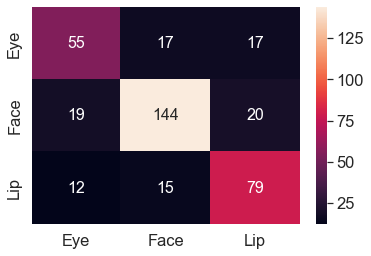

In [ ]:
from sklearn import metrics
import seaborn as sns
cm = metrics.confusion_matrix(Hog_gb_y_test, SVM_Hog_gb_y_pred)
df_cm = pd.DataFrame(cm, index = ['Eye','Face','Lip'],columns = ['Eye','Face','Lip'])
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="g")

**After seeing the result from the SVM classifier, I want to find out the best hyperparameter and accuracy score for the model so as to improve the accuracy.**

**I am using HalvingGridSearch cv where it would try out the various hyperparameter and return the hyperparameter that gives the best accuracy and it would also be faster as compared to grid search.**

In [ ]:
svm_params = {
            'C': [0.1, 1, 10,100],
            'gamma' : [0.1, 1, 10,100],
            'kernel': ['linear','poly','rbf'],
            'degree': [0,1,2,3,4,5]
         }

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
svm_grid = HalvingGridSearchCV(SVM_classifier, svm_params,random_state=42)

In [ ]:
svm_grid.fit(Hog_gb_X_train,Hog_gb_y_train)

HalvingGridSearchCV(estimator=SVC(C=1, degree=2, kernel='linear'),
                    param_grid={'C': [0.1, 1, 10, 100],
                                'degree': [0, 1, 2, 3, 4, 5],
                                'gamma': [0.1, 1, 10, 100],
                                'kernel': ['linear', 'poly', 'rbf']},
                    random_state=42,
                    refit=<function _refit_callable at 0x000001DD697A1048>)

In [ ]:
svm_grid.best_params_
svm_grid.best_estimator_

SVC(C=0.1, gamma=0.1, kernel='poly')

**Indeed after tuning the hyperparameter, the accuracy of the Svm.SVC classifier improve from 0.74 to 0.82.**

**Based on the classification report, I can see that the model has a better score for the Face category with a precision of 0.78, recall of 0.96 and f1-score of 0.86 while for the Eye category it has a precision of 0.89, recall of 0.63 and f1-score of 0.74.**

**As for the Lip category it has a precision of 0.87, recall of 0.75 and a f1-score of 0.81.**

In [ ]:
SVM_Hog_gb_y_pred = svm_grid.predict(Hog_gb_X_test)
print(classification_report(Hog_gb_y_test,SVM_Hog_gb_y_pred))
print("Accuracy Score: " + str(accuracy_score(Hog_gb_y_test, SVM_Hog_gb_y_pred)))

              precision    recall  f1-score   support

         Eye       0.89      0.63      0.74        89
        Face       0.78      0.96      0.86       183
         Lip       0.87      0.75      0.81       106

    accuracy                           0.82       378
   macro avg       0.85      0.78      0.80       378
weighted avg       0.83      0.82      0.82       378

Accuracy Score: 0.8227513227513228


## Evaluation
Perform the necessary steps and explain the rationale taken here.



### Raw or HOG Features

*Compare the accuracy of the different image preprocessing technique for the Raw Features*

In [ ]:
print('Raw Features without Preprocessing')
print("-"*60)
print("Accuracy: " + str(accuracy_score(raw_y_test, raw_y_pred)))
print(classification_report(raw_y_test, raw_y_pred))
print('Raw Features with Grayscaling')
print("-"*60)
print("Accuracy: " + str(accuracy_score(gray_y_test, gray_y_pred)))
print(classification_report(gray_y_test, gray_y_pred))
print('Raw Features with Gaussian Blurring')
print("-"*60)
print("Accuracy: " + str(accuracy_score(blur_y_test, blur_y_pred)))
print(classification_report(blur_y_test, blur_y_pred))
print('Raw Features with Grayscaling & Gaussian Blurring')
print("-"*60)
print("Accuracy: " + str(accuracy_score(gb_y_test, gb_y_pred)))
print(classification_report(gb_y_test, gb_y_pred))
print('Raw Features with Morphological Operations')
print("-"*60)
print("Accuracy: " + str(accuracy_score(Morp_y_test, Morp_y_pred)))
print(classification_report(Morp_y_test, Morp_y_pred))
print('Raw Features without Gaussian Blurring & Morphological Operations')
print("-"*60)
print("Accuracy: " + str(accuracy_score(GBM_y_test,GBM_y_pred)))
print(classification_report(GBM_y_test,GBM_y_pred))

Raw Features without Preprocessing
------------------------------------------------------------
Accuracy: 0.7037037037037037
              precision    recall  f1-score   support

         Eye       0.58      0.49      0.53        89
        Face       0.72      0.77      0.74       183
         Lip       0.76      0.77      0.77       106

    accuracy                           0.70       378
   macro avg       0.69      0.68      0.68       378
weighted avg       0.70      0.70      0.70       378

Raw Features with Grayscaling
------------------------------------------------------------
Accuracy: 0.656084656084656
              precision    recall  f1-score   support

         Eye       0.55      0.44      0.49        89
        Face       0.69      0.79      0.74       183
         Lip       0.66      0.61      0.63       106

    accuracy                           0.66       378
   macro avg       0.63      0.61      0.62       378
weighted avg       0.65      0.66      0.65      

*Compare the accuracy of the different image preprocessing technique for the HOG Features*

In [ ]:
print('HOG Features without Preprocessing')
print("-"*60)
print("Accuracy: " + str(accuracy_score(Hog_y_test, Hog_y_pred)))
print(classification_report(Hog_y_test, Hog_y_pred))

print('HOG Features with Grayscaling')
print("-"*60)
print("Accuracy: " + str(accuracy_score(Hog_gray_y_test, Hog_gray_y_pred)))
print(classification_report(Hog_gray_y_test, Hog_gray_y_pred))

print('HOG Features with Gaussian Blurring')
print("-"*60)
print("Accuracy: " + str(accuracy_score(Hog_blur_y_test, Hog_blur_y_pred)))
print(classification_report(Hog_blur_y_test, Hog_blur_y_pred))

print('HOG Features with Grayscaling & Gaussian Blurring')
print("-"*60)
print("Accuracy: " + str(accuracy_score(Hog_gb_y_test, Hog_gb_y_pred)))
print(classification_report(Hog_gb_y_test, Hog_gb_y_pred))

print('HOG Features with Morphological Operations')
print("-"*60)
print("Accuracy: " + str(accuracy_score(Hog_Morp_y_test, Hog_Morp_y_pred)))
print(classification_report(Hog_Morp_y_test, Hog_Morp_y_pred))

print('HOG Features without Gaussian Blurring & Morphological Operations')
print("-"*60)
print("Accuracy: " + str(accuracy_score(Hog_GBM_y_test, Hog_GBM_y_pred)))
print(classification_report(Hog_GBM_y_test, Hog_GBM_y_pred))

HOG Features without Preprocessing
------------------------------------------------------------
Accuracy: 0.701058201058201
              precision    recall  f1-score   support

         Eye       0.65      0.62      0.63        89
        Face       0.76      0.74      0.75       183
         Lip       0.64      0.70      0.67       106

    accuracy                           0.70       378
   macro avg       0.68      0.69      0.69       378
weighted avg       0.70      0.70      0.70       378

HOG Features with Grayscaling
------------------------------------------------------------
Accuracy: 0.6825396825396826
              precision    recall  f1-score   support

         Eye       0.62      0.61      0.61        89
        Face       0.74      0.72      0.73       183
         Lip       0.64      0.68      0.66       106

    accuracy                           0.68       378
   macro avg       0.67      0.67      0.67       378
weighted avg       0.68      0.68      0.68      

C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\limsi\anaconda3\envs\pythoncv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*Compare the accuracy of the different image preprocessing technique for the Sift Features*

In [ ]:
print('Sift Features with Grayscaling')
print("-"*60)
print("Accuracy: " + str(accuracy_score(sift_y_test, sift_y_pred)))
print(classification_report(sift_y_test, sift_y_pred))

print('Sift Features with Grayscaling & Gaussian Blurring')
print("-"*60)
print("Accuracy: " + str(accuracy_score(gb_sift_y_test, gb_sift_y_pred)))
print(classification_report(gb_sift_y_test, gb_sift_y_pred))

print('Sift Features with Morphological Operations')
print("-"*60)
print("Accuracy: " + str(accuracy_score(Morp_sift_y_test, Morp_sift_y_pred)))
print(classification_report(Morp_sift_y_test, Morp_sift_y_pred))


print('Sift Features without Gaussian Blurring & Morphological Operations')
print("-"*60)
print("Accuracy: " + str(accuracy_score(GBM_sift_y_test, GBM_sift_y_pred)))
print(classification_report(GBM_sift_y_test, GBM_sift_y_pred))

Sift Features with Grayscaling
------------------------------------------------------------
Accuracy: 0.6084656084656085
              precision    recall  f1-score   support

         Eye       0.49      0.42      0.45        89
        Face       0.66      0.73      0.69       183
         Lip       0.60      0.57      0.58       106

    accuracy                           0.61       378
   macro avg       0.58      0.57      0.57       378
weighted avg       0.60      0.61      0.60       378

Sift Features with Grayscaling & Gaussian Blurring
------------------------------------------------------------
Accuracy: 0.6349206349206349
              precision    recall  f1-score   support

         Eye       0.53      0.45      0.48        89
        Face       0.68      0.73      0.70       183
         Lip       0.63      0.63      0.63       106

    accuracy                           0.63       378
   macro avg       0.61      0.60      0.61       378
weighted avg       0.63      0.

**In conclusion, after comparing the model accuracy results for both the Raw features and Hog features and trying out various image preprocessing techniques, I realized that before any preprocessing is done Raw features seems to have a much higher accuracy in classifying the images correctly with an accuracy of 0.703.**

**However, after performing some preprocessing on both the Raw and Hog features I realized that when we preprocess the hog features by performing Grayscaling & Gaussian Blurring, the accuracy is the highest among all of about 0.746.**

**Thus, I have decided to select Hog features that have been preprocess with Grayscaling and Gaussian Blurring and try it out on other models to compare the accuracy of its classification.**

## Compare Model Results

In [ ]:
print('Logistic Regression Model')
print("-"*60)
print("Accuracy: " + str(accuracy_score(Hog_gb_y_test, Hog_gb_y_pred)))
print(classification_report(Hog_gb_y_test, Hog_gb_y_pred))
print('KNN Model')
print("-"*60)
print(classification_report(Hog_gb_y_test, knn_classifier.predict(Hog_gb_X_test)))
knn_Hog_gb_y_pred = knn_classifier.predict(Hog_gb_X_test)
print("Accuracy: " + str(accuracy_score(Hog_gb_y_test, knn_Hog_gb_y_pred)))
print('SVM Model')
print("-"*60)
print(classification_report(Hog_gb_y_test,SVM_Hog_gb_y_pred))
print("Accuracy Score: " + str(accuracy_score(Hog_gb_y_test, SVM_Hog_gb_y_pred)))

Logistic Regression Model
------------------------------------------------------------
Accuracy: 0.746031746031746
              precision    recall  f1-score   support

         Eye       0.66      0.63      0.64        89
        Face       0.82      0.78      0.80       183
         Lip       0.70      0.79      0.74       106

    accuracy                           0.75       378
   macro avg       0.73      0.73      0.73       378
weighted avg       0.75      0.75      0.75       378

KNN Model
------------------------------------------------------------
              precision    recall  f1-score   support

         Eye       0.69      0.66      0.68        89
        Face       0.86      0.77      0.81       183
         Lip       0.67      0.81      0.73       106

    accuracy                           0.76       378
   macro avg       0.74      0.75      0.74       378
weighted avg       0.77      0.76      0.76       378

Accuracy: 0.7566137566137566
SVM Model
-------------

**After training with multiple model, I have compared the model result of the various model and SVM. SVC is the model that gives the highest accuracy of 0.82 for the hog feature that is preprocess by Gaussian Blurring & Grayscaling.**